# GRSW observations notebook

This notebook shows how to access the summary table of the observations data compiled for the GRSW workshop.
It require to pull a python package to access easily the data stored on [DACE](https://dace.unige.ch/dashboard/)

### Importing useful functions

First we need to import the function needed for the notebook

In [1]:
import os
import sys
from pathlib import Path
import pandas as pd
# add the parent directory to the path so we can import the module
parent_of_current_working_directory = Path(os.getcwd()).resolve().parent
sys.path.insert(0, parent_of_current_working_directory.as_posix())
from src.ResonantState.data_download import get_metadata_observations, download_observation_samples

In [2]:
from src.ResonantState.analyse_samples import *

We can download the metatable to have a look on the available observations samples

In [3]:
dataframe_observations = get_metadata_observations()
dataframe_observations.head()

,planet_name,star_name,analysis_id,contact_mail,default,robustness,period_days,radius_planet_r_earth,mass_planet_m_earth,mass_star_m_sun,...,eccentricity_prior,methods,instruments,bibtex,code_used,other_remarks,metadata_file,additional_info,readme_file,url_of_samples
0,K00972.01,K00972,0,darin_ragozzine@byu.edu,1,-1,13.119837,3.228469,0.064462,1.602344,...,uniform in sqrt(e),photo-dynamics,Kepler,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
1,K00972.02,K00972,0,darin_ragozzine@byu.edu,1,-1,7.821838,1.040388,0.459848,1.602344,...,uniform in sqrt(e),photo-dynamics,Kepler,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
2,K01239.01,K01239,0,darin_ragozzine@byu.edu,1,-1,0.783274,1.454645,7.688309,0.965796,...,uniform in sqrt(e),photo-dynamics,Kepler,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
3,K01239.02,K01239,0,darin_ragozzine@byu.edu,1,-1,3.174604,1.488855,8.795811,0.965796,...,uniform in sqrt(e),photo-dynamics,Kepler,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
4,K01884.01,K01884,0,darin_ragozzine@byu.edu,1,-1,23.096662,4.063375,8.459971,0.832291,...,uniform in sqrt(e),photo-dynamics,Kepler,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...


We can have a look on the available columns:

In [4]:
dataframe_observations.head(0).T

""
planet_name
star_name
analysis_id
contact_mail
default
robustness
period_days
radius_planet_r_earth
mass_planet_m_earth
mass_star_m_sun


Let's list the list of analysed systems:

In [5]:
dataframe_observations["star_name"].unique()

array(['K00972', 'K01239', 'K01884', 'K02093', 'K02357', 'K02421',
       'K02449', 'K02554', 'K02610', 'K02696', 'K02840', 'K02949',
       'K02972', 'K03029', 'K03083', 'K03111', 'K03196', 'K03209',
       'K03340', 'K03341', 'K03395', 'K03401', 'K03420', 'K03462',
       'K03495', 'K04021', 'K04136', 'K04149', 'K04287', 'K04307',
       'K04421', 'K04435', 'K04504', 'K04526', 'K04535', 'K04541',
       'K04567', 'K04577', 'K04647', 'K04657', 'K04700', 'K04773',
       'K04782', 'K04846', 'K04871', 'K04896', 'K04913', 'K05007',
       'K06093', 'K06103', 'K06120', 'K06178', 'K06182', 'K06191',
       'K06209', 'K06245', 'K06259', 'K06355', 'K07117', 'K07685',
       'Kepler-10', 'Kepler-100', 'Kepler-1006', 'Kepler-101',
       'Kepler-1010', 'Kepler-1014', 'Kepler-102', 'Kepler-103',
       'Kepler-1038', 'Kepler-104', 'Kepler-1042', 'Kepler-1047',
       'Kepler-105', 'Kepler-1050', 'Kepler-1052', 'Kepler-1056',
       'Kepler-106', 'Kepler-1065', 'Kepler-1067', 'Kepler-107',
     

Lets keep only the analysis of the Kepler-51 systems:

In [6]:
dataframe_observations_Kep51 = dataframe_observations[dataframe_observations["star_name"].isin(['Kepler-51'])]

In [7]:
dataframe_observations_Kep51.head(100)

,planet_name,star_name,analysis_id,contact_mail,default,robustness,period_days,radius_planet_r_earth,mass_planet_m_earth,mass_star_m_sun,...,eccentricity_prior,methods,instruments,bibtex,code_used,other_remarks,metadata_file,additional_info,readme_file,url_of_samples
1645,Kepler-51 b,Kepler-51,0,shadden1107@gmail.com,1,1,45.153994,7.601707,2.541467,1.040000,...,uniform,extracted times,Kepler,2017AJ....154....5H,2014ApJ...787..132D,"Last column value, dt, specifies initial condi...",https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
1646,Kepler-51 c,Kepler-51,0,shadden1107@gmail.com,1,1,85.312028,9.637988,3.889650,1.040000,...,uniform,extracted times,Kepler,2017AJ....154....5H,2014ApJ...787..132D,"Last column value, dt, specifies initial condi...",https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
1647,Kepler-51 d,Kepler-51,0,shadden1107@gmail.com,1,1,130.186048,10.397749,6.423000,1.040000,...,uniform,extracted times,Kepler,2017AJ....154....5H,2014ApJ...787..132D,"Last column value, dt, specifies initial condi...",https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
1648,Kepler-51 b,Kepler-51,1,shadden1107@gmail.com,0,1,45.154075,7.601707,3.736545,1.040000,...,log-uniform,extracted times,Kepler,2017AJ....154....5H,2014ApJ...787..132D,"Last column value, dt, specifies initial condi...",https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
1649,Kepler-51 c,Kepler-51,1,shadden1107@gmail.com,0,1,85.311249,9.637988,4.356044,1.040000,...,log-uniform,extracted times,Kepler,2017AJ....154....5H,2014ApJ...787..132D,"Last column value, dt, specifies initial condi...",https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
1650,Kepler-51 d,Kepler-51,1,shadden1107@gmail.com,0,1,130.186722,10.397749,7.252768,1.040000,...,log-uniform,extracted times,Kepler,2017AJ....154....5H,2014ApJ...787..132D,"Last column value, dt, specifies initial condi...",https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
1651,Kepler-51 b,Kepler-51,2,kmasuda@ess.sci.osaka-u.ac.jp,0,0,45.154293,6.927440,3.586360,0.960000,...,uniform,TTV,"Kepler, HST",2024AJ....168..294M,https://github.com/kemasuda/jnkepler,Posterior samples from a three-planet fit to t...,https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
1652,Kepler-51 d,Kepler-51,2,kmasuda@ess.sci.osaka-u.ac.jp,0,1,130.194122,9.394748,5.549486,0.960000,...,uniform,TTV,"Kepler, HST",2024AJ....168..294M,https://github.com/kemasuda/jnkepler,Posterior samples from a three-planet fit to t...,https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
1653,kepler-51 c,Kepler-51,2,kmasuda@ess.sci.osaka-u.ac.jp,0,1,85.317904,5.693787,4.322407,0.960000,...,uniform,TTV,"Kepler, HST",2024AJ....168..294M,https://github.com/kemasuda/jnkepler,Posterior samples from a three-planet fit to t...,https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
1654,Kepler-51 b,Kepler-51,3,kmasuda@ess.sci.osaka-u.ac.jp,0,-1,45.154105,6.927440,3.233482,0.960000,...,uniform,TTV,"Kepler, HST, TESS, JWST, MuSCAT2, MuSCAT3, APO...",2024AJ....168..294M,https://github.com/kemasuda/jnkepler,Posterior samples from a four-planet fit to tr...,https://dace.unige.ch/downlo

Let's download the samples from these systems. If a path is given, it saves the samples into the given directory

In [8]:
#download_destination_path = "downloaded_observtions_samples/"
download_destination_path = None
df_list = download_observation_samples(dataframe_observations_Kep51, download_destination_path)

The downloaded samples are returned as a list. Each element of the list is a dictionnary containing informations on the downloaded sample and the sample itself. 

Looking at the first element of the list, we can see its structure:

In [9]:
for k,v in df_list[0].items():
    if k == "sample":
        print(f"{k}:\t...")
    else:
        print(f"{k}:\t{v}")

sample_name:	Kepler-51_0
planets_list:	['Kepler-51 b', 'Kepler-51 c', 'Kepler-51 d']
code:	2014ApJ...787..132D
bibtex:	2017AJ....154....5H
contact_email:	shadden1107@gmail.com
sample:	...


### Analysis examples

Let's make some basic plots to have a look at the samples.

You can directly plot the following parameters:
- "period"      (in days)
- "k"           (ecos(varpi))
- "h"           (esin(varpi))
- "incl"        (inclination in deg)
- "omega"       (longitude of ascending node in deg)
- "mass"        (in stellar mass)
- "radius"      (in stellar radii)
- "lambda"      (mean longitude in deg)

You can also extract the following derived parameters:
- "ecc"         (eccentricity)
- "varpi"       (longitude of pericenter in deg)
- "density"     (in stellar density)

Let's first make histograms comparing the planets in this system across the different analyses.

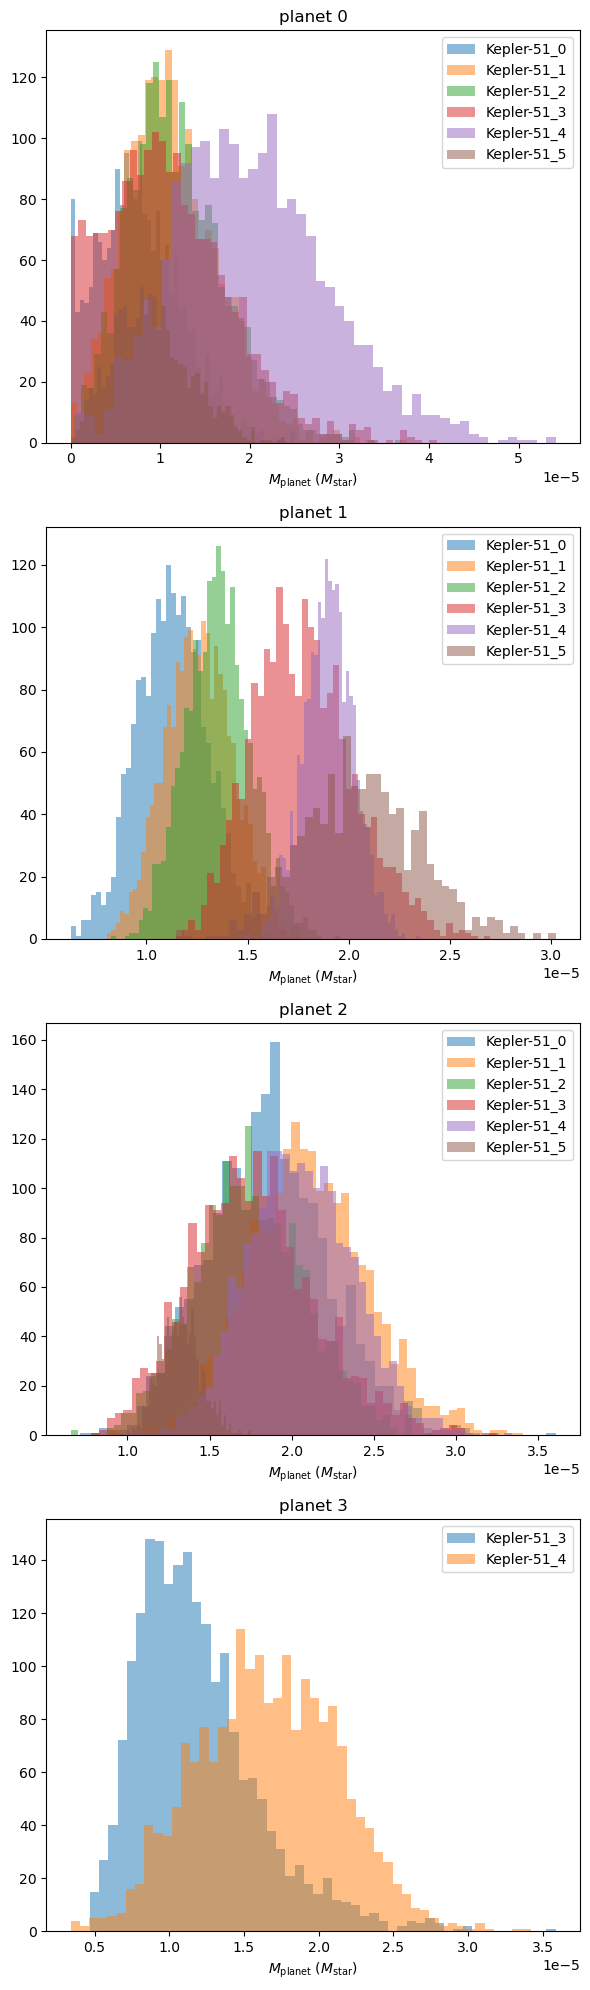

In [10]:
plot_histograms(df_list, param='mass')

Let's convert the units to something more intuitive.

Valid units are: "star" (default), "sun", "earth", "jup", or "SI"

Unit conversion applies to parameters "mass", "radius", or "density"

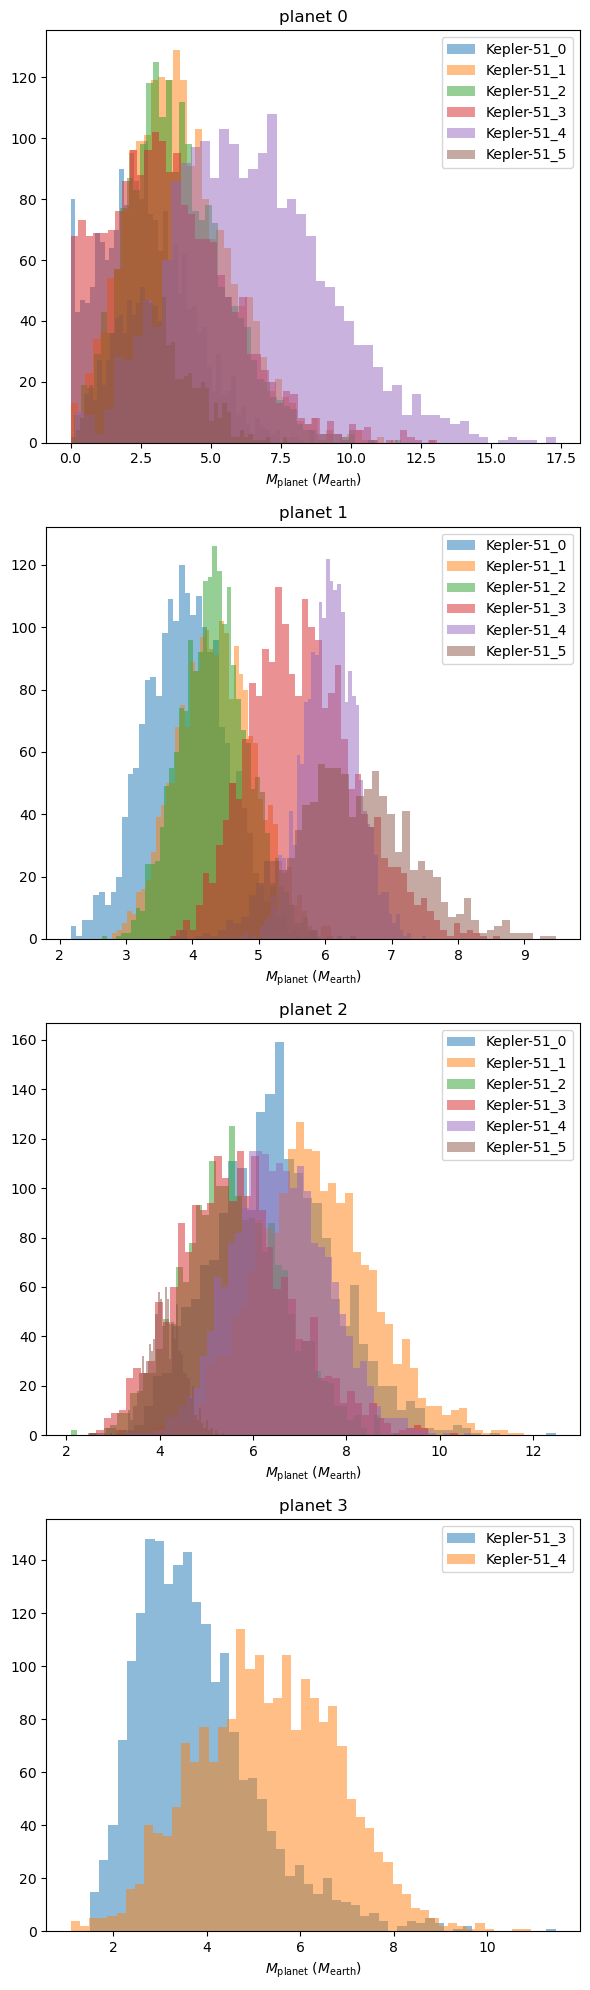

In [11]:
plot_histograms(df_list, param='mass', units='earth')

Let's now make scatter plots of the different parameters:

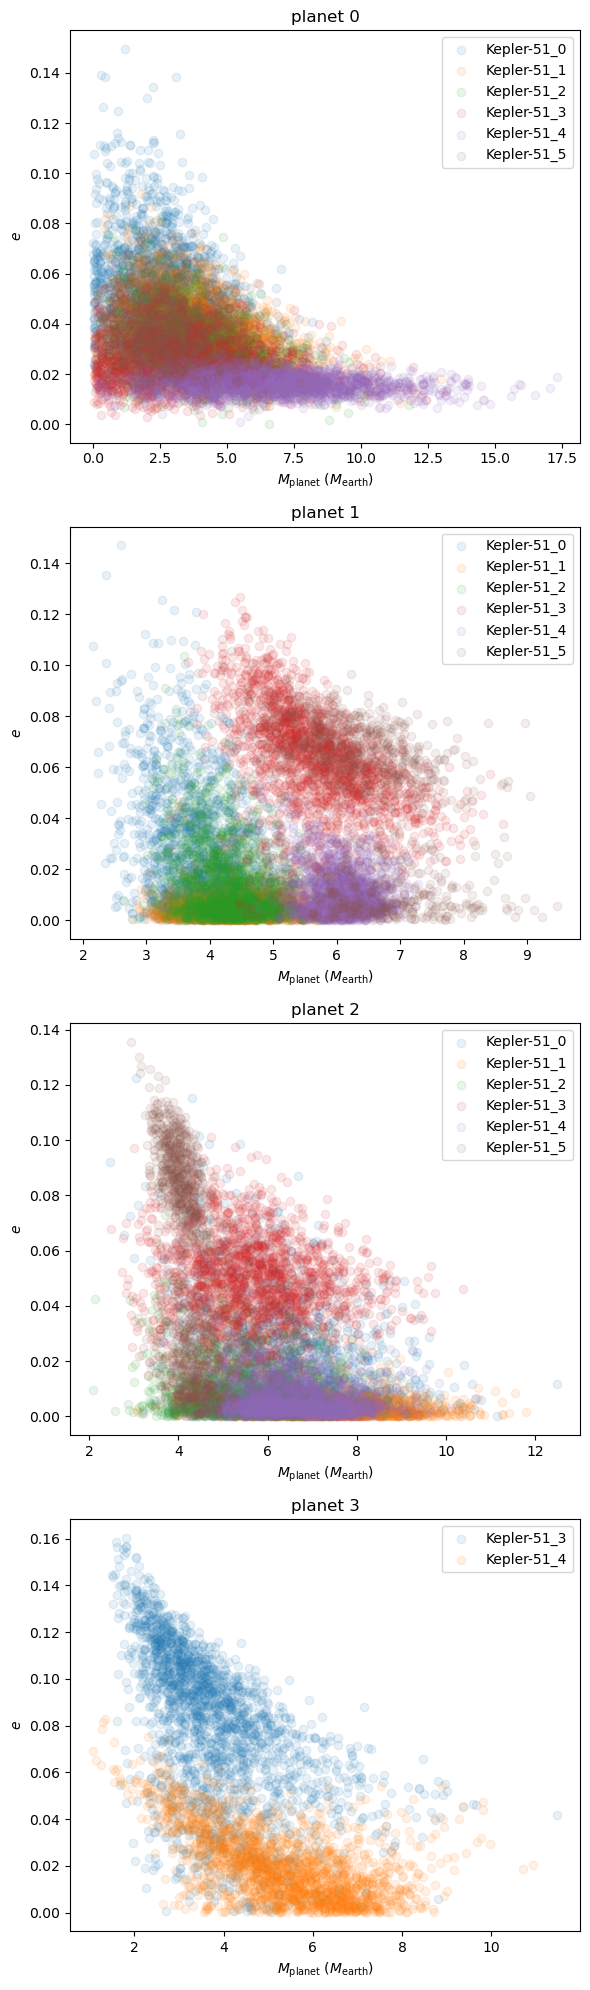

In [12]:
plot_samples(df_list, x_param='mass', y_param='ecc', units='earth')

We can for example slice the list of dictionaries to only plot a subset of the analyses.

/Users/marylyn/resonant_workshop/ResonantState/src/ResonantState/analyse_samples.py:123: RuntimeWarning: divide by zero encountered in divide
  samples = par1/(par2**3)


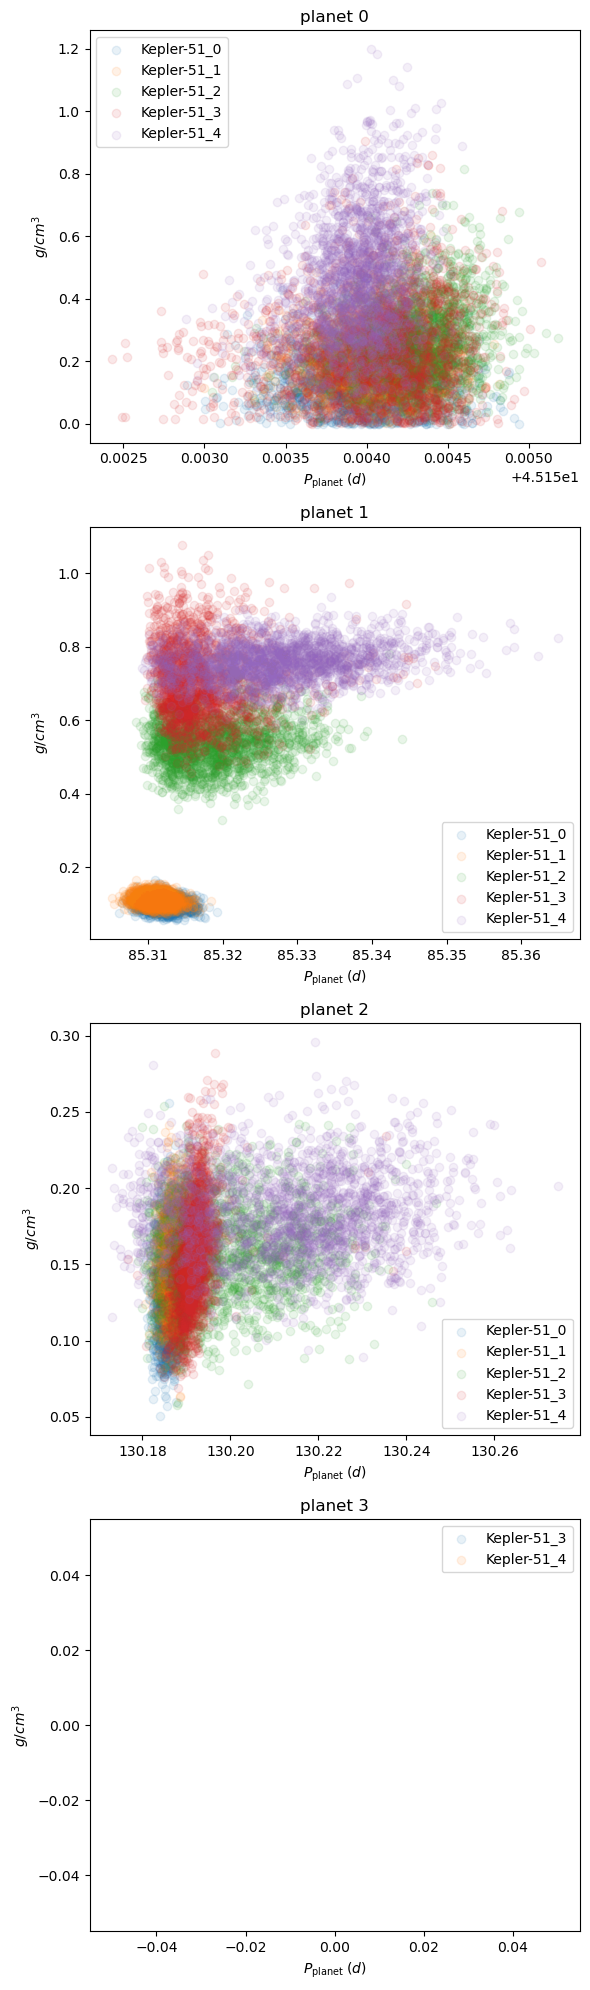

In [13]:
plot_samples(df_list[:-1], x_param='period', y_param='density', units='SI')

We might also be interested in the posterior distributions of consecutive planets:

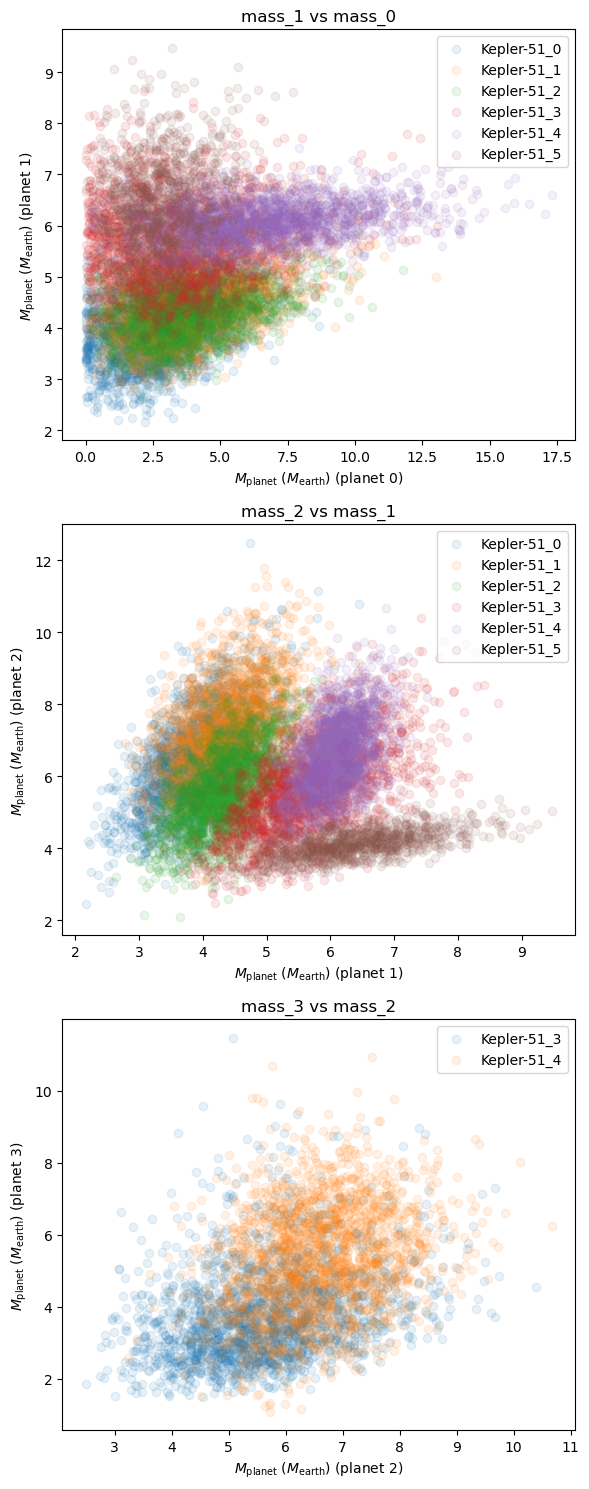

In [14]:
plot_consecutive_planets(df_list, 'mass', units='earth')

We can also compare the period ratios between adjacent planets:

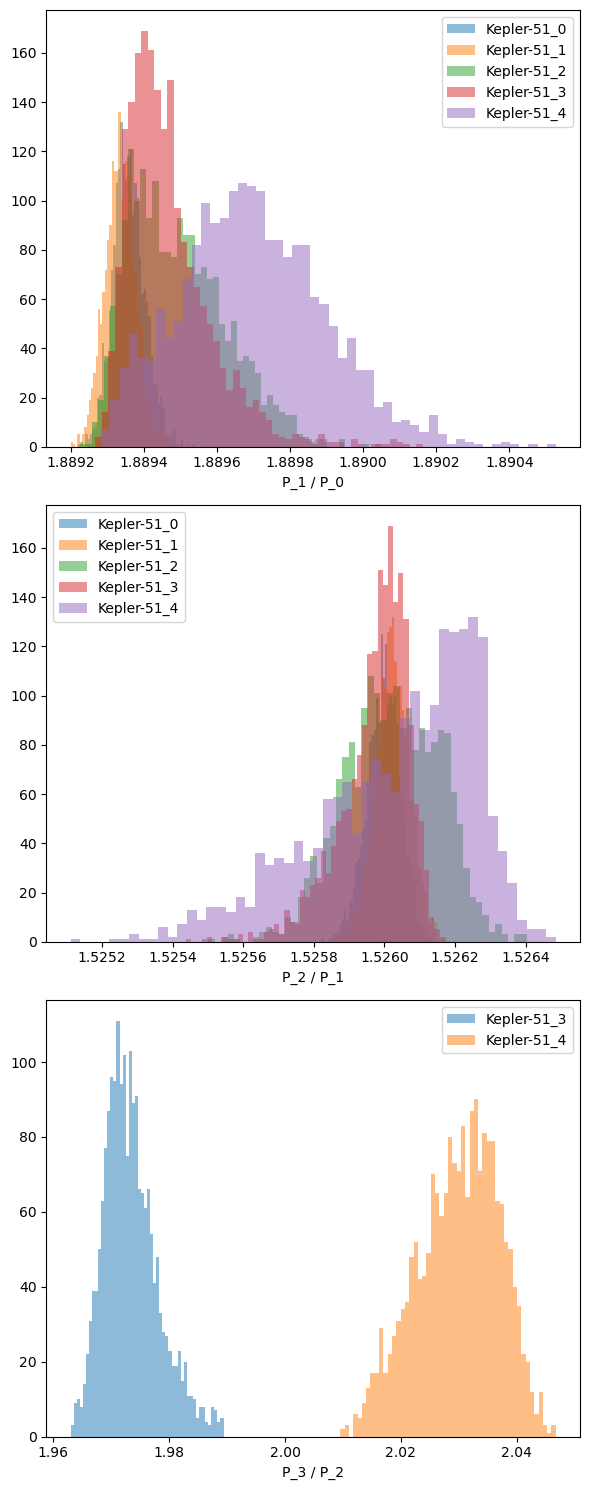

In [15]:
#compare_period_ratios(df_list)
compare_period_ratios(df_list[:-1])